In [1]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def make_figure(df, output_file="fig3.pdf"):
    sns.set_palette("rocket_r")
    
    data = df.copy()
    data["sector/Intensity"] = df["sector"].astype(str) + ", " + df["Intensity"]

    # Make the plot
    fig, ax = plt.subplots(1,1, figsize=(12,4))

    sns.barplot(ax=ax, x="sector/Intensity", y="counts", hue="type", ci=None, data=data)

    width = .1
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - width

        # we change the bar width
        patch.set_width(width)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
    
    ax.set_xlabel("Sector, Intensity")
    ax.set_ylabel("Proportion of Counts")
    plt.legend(title='Data Source', labels=['Single Cell', '2ng', '0.2ng', 'Bulk'])

    plt.savefig(output_file)
    plt.show()

In [3]:
data_types = ["sc", "2ng", "0.2ng", "bulk"]
ys = []
bs = []
for data_type in data_types:
    df = pd.read_csv("data/combined/all_" + data_type + ".tsv", sep="\t")
    df = df[["Intensity", "sector", "Ion Type"]]
    
    df_b = df[df["Ion Type"] == "b"]
    df_b = df_b[["Intensity", "sector"]]

    df_y = df[df["Ion Type"] == "y"]
    df_y = df_y[["Intensity", "sector"]]

    b_counts = pd.DataFrame(df_b.value_counts())
    b_counts = b_counts.reset_index()
    b_counts.rename(columns = {0:'counts'}, inplace = True)
    
    y_counts = pd.DataFrame(df_y.value_counts())
    y_counts.rename(columns = {0:'counts'}, inplace = True)
    y_counts = y_counts.reset_index()
    
    intensities = ["none", "low", "medium", "high"]
    sectors = [1, 2, 3]

    df_template = pd.DataFrame(product(intensities, sectors), columns=["Intensity", "sector"])
    b_template = df_template.copy()
    y_template = df_template.copy()
    
    b = pd.merge(b_template, b_counts, on=["Intensity", "sector"], how="outer")
    b_counts_sum = b.counts.sum()
    b.counts = b.counts.apply(lambda x: x / b_counts_sum)
    b["type"] = data_type
    bs.append(b)
    
    y = pd.merge(y_template, y_counts, on=["Intensity", "sector"], how="outer")
    y_counts_sum = y.counts.sum()
    y.counts = y.counts.apply(lambda x: x / y_counts_sum)
    y["type"] = data_type
    ys.append(y)

In [4]:
all_y = pd.concat(ys)
all_b = pd.concat(bs)
# Manually select the best looking ones, maybe in the future could automatically select the most significant
all_y = all_y.loc[
    ((all_y["sector"] == 1) & (all_y["Intensity"] == "none")) |
    ((all_y["sector"] == 3) & (all_y["Intensity"] == "none")) |
    ((all_y["sector"] == 3) & (all_y["Intensity"] == "low")) |
    ((all_y["sector"] == 1) & (all_y["Intensity"] == "medium")) |
    ((all_y["sector"] == 2) & (all_y["Intensity"] == "medium")) |
    ((all_y["sector"] == 2) & (all_y["Intensity"] == "high")) 
]
all_b = all_b.loc[
    ((all_b["Intensity"] == "none")) |
    ((all_b["Intensity"] == "low"))
]

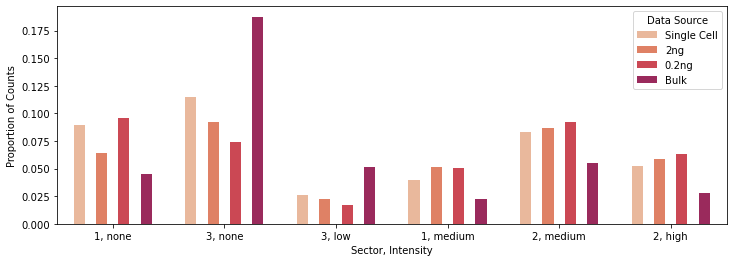

In [5]:
make_figure(all_y)

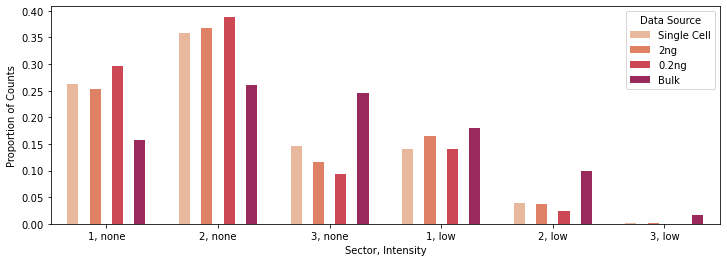

In [6]:
make_figure(all_b)